In [1]:
# Standard modules
import pdb
import sys
import os
import pickle
import numpy as np
import pandas as pd
from lmfit import Parameters, minimize, fit_report
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

sys.path.append("../..")

from simstackwrapper import SimstackWrapper
from simstackresults import SimstackResults
from simstackplots import SimstackPlots
from simstacktoolbox import SimstackToolbox

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

# Step 4.  This is where SEDs are used to estimate cosmological outcomes.

The star-formation rate density and fits to dust temperature evolution are estimated here.  

In [2]:
sample_number = 15000
sample_discard = 3000
sample_sigma = 3
sample_speed = ''
sample_prior = '_mixed_prior_qt'
sample_prefix = "{}-{}-{}sigma{}{}".format(sample_number, sample_discard, sample_sigma, sample_speed, sample_prior)
print(sample_prefix)

5000-2500-3sigma_mixed_prior


In [3]:
pickle_path_suffix =  "cosmos2020_farmer_nuvrj_0p01_0p5_1_1p5_2_2p5_3_3p5_4_5_6_8_10p0_X_4_foregnd_atonce_bootstrap_1-150"
underscore_suffix = ''
pickle_path = os.environ['PICKLESPATH']+'/'+os.path.join("simstack","stacked_flux_densities",pickle_path_suffix)
file_path = os.path.join(pickle_path+underscore_suffix, pickle_path_suffix+".pkl")
path_ini_file = os.path.join(pickle_path+underscore_suffix, "cosmos2020_farmer.ini")
if os.path.isdir(pickle_path):
    print(pickle_path)
else:
    print('No directory:',pickle_path)

D:\pickles/simstack\stacked_flux_densities\cosmos2020_farmer_nuvrj_0p01_0p5_1_1p5_2_2p5_3_3p5_4_5_6_8_10p0_X_4_foregnd_atonce_bootstrap_1-150


# Load Measurement Pickle and Feed into Results/Plots

In [4]:
# Import saved stacking measurement
simstack_object = SimstackToolbox.import_saved_pickles(file_path)
simstack_catalog_object = SimstackWrapper(path_ini_file, read_maps=False, read_catalog=True, keep_catalog=True, stack_automatically=False, save_automatically=False)

In [5]:
# Pass saved results into SimstackResults
simstack_object = SimstackResults(simstack_object)

In [6]:
# Pass saved results into SimstackPlots
simstack_object = SimstackPlots(simstack_object)

In [7]:
# Call parse_results which translates the raw results into a results_dict for plotting/interpreting.
simstack_object.parse_results(catalog_object=simstack_catalog_object, estimate_mcmcs=False)

# Load Saved MCMC Samples

In [8]:
samples_filename = '_'.join(['mcmc_samples',sample_prefix,'dict'])+'.pkl'
print(samples_filename)
flat_samples_dict = SimstackToolbox.import_saved_pickles(os.path.join(pickle_path,samples_filename))
flat_samples_dict.keys()

mcmc_samples_5000-2500-3sigma_mixed_prior_dict.pkl


dict_keys(['wavelengths', 'z_median', 'dz_median', 'm_median', 'ngals', 'y', 'yerr', 'mcmc_dict'])

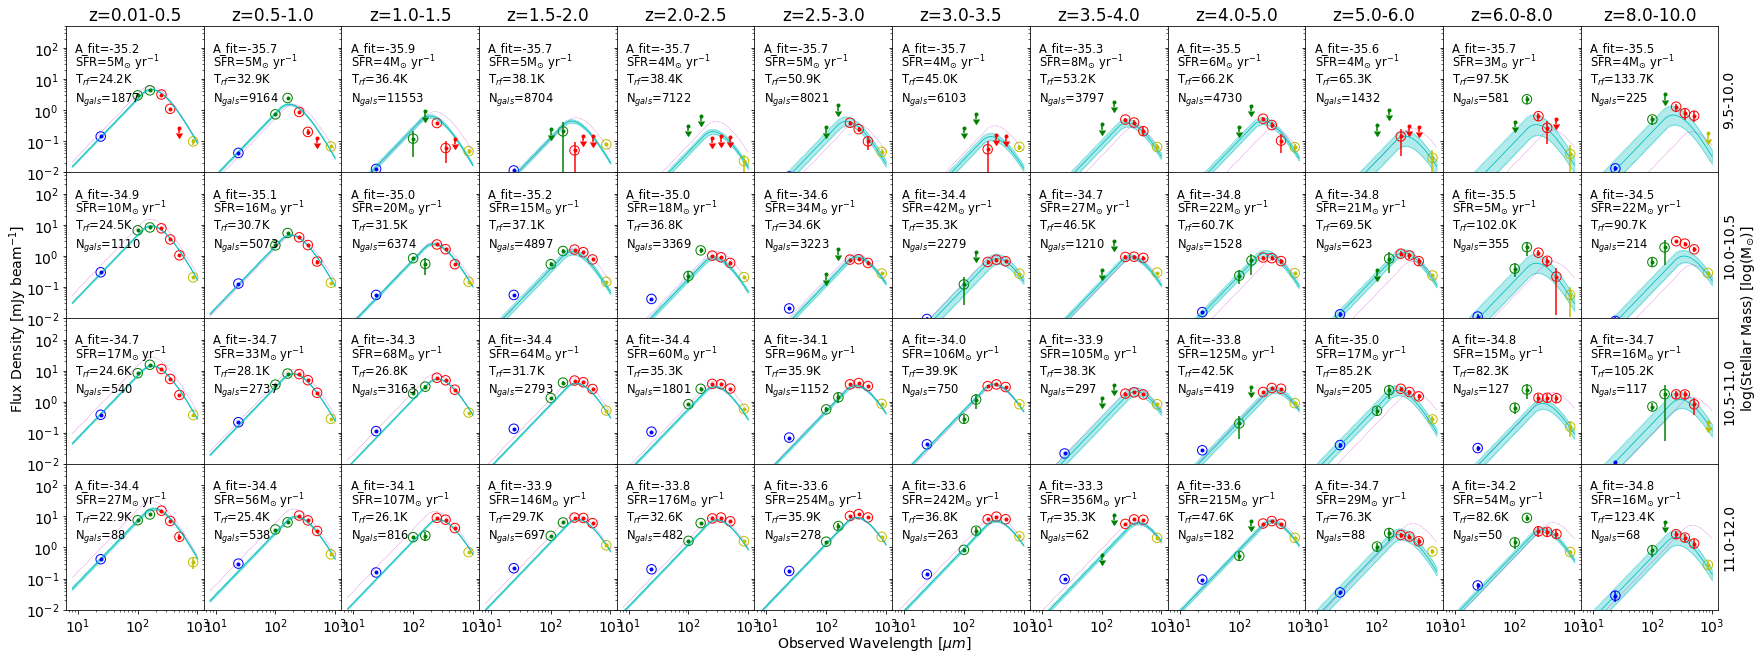

In [9]:
simstack_object.plot_mcmc_seds(flat_samples_dict, bootstrap_dict=None, errors=('25', '75'))

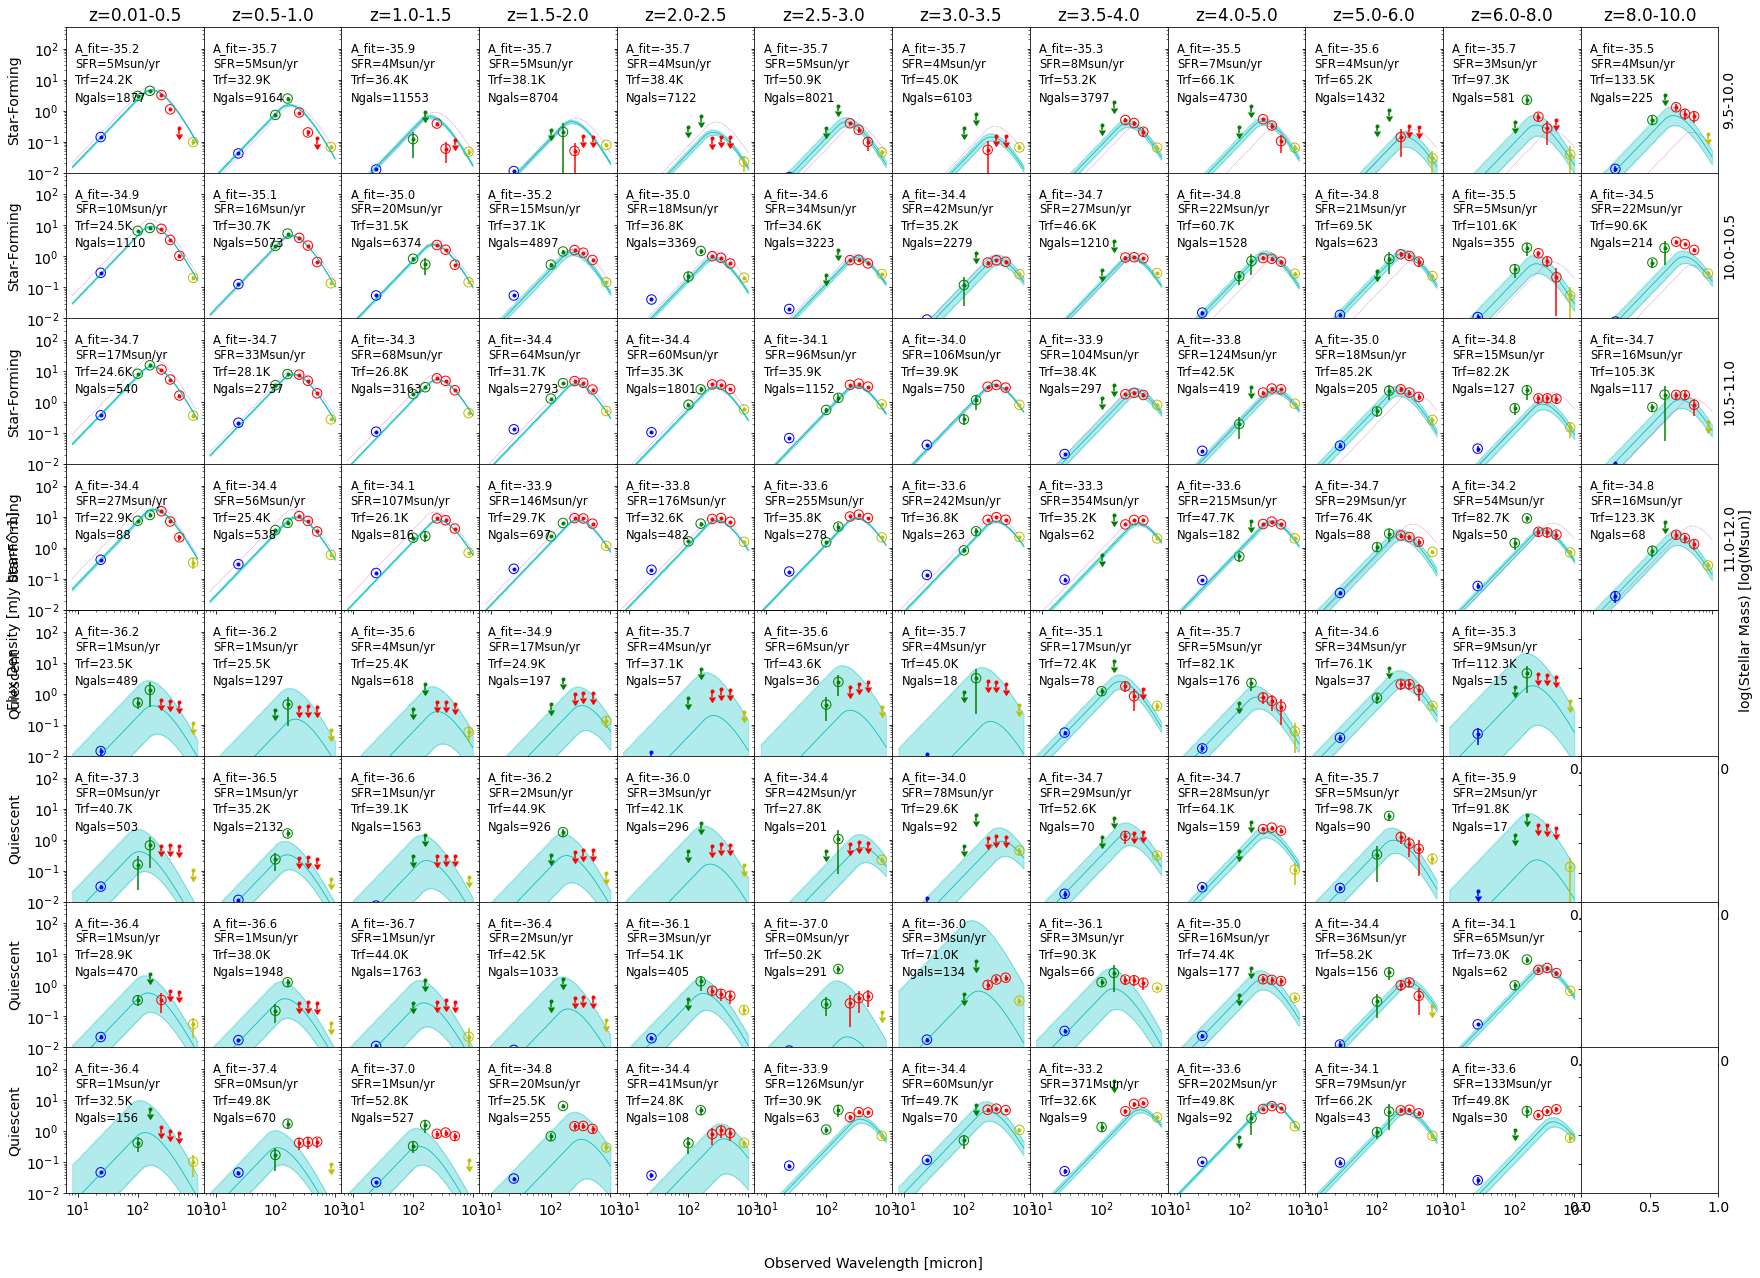

In [9]:
simstack_object.plot_mcmc_seds(flat_samples_dict, bootstrap_dict=None,  show_qt=True, errors=('25', '75'))

# Estimate Luminosity/SFR Density 

In [14]:
min_detections = 2
include_qt = False
cosmos_area_deg2 = 1.6055  # deg2

### Estimate LIR

In [11]:
# Estimate LIR from samples dict
lir_dict = simstack_object.get_lir_from_mcmc_samples(flat_samples_dict, min_detections=min_detections, include_qt=include_qt)

In [12]:
# Save LIR results
lir_filename = '_'.join(['lir',sample_prefix,'dict'])+'.pkl'
SimstackToolbox.save_to_pickles(os.path.join(pickle_path,lir_filename), lir_dict)
print('Saving', os.path.join(pickle_path,lir_filename))

Saving D:\pickles/simstack\stacked_flux_densities\cosmos2020_farmer_nuvrj_0p01_0p5_1_1p5_2_2p5_3_3p5_4_5_6_8_10p0_X_4_foregnd_atonce_bootstrap_1-150\lir_5000-2500-3sigma_mixed_prior_dict.pkl


In [13]:
lird_dict = simstack_object.estimate_luminosity_density(lir_dict, cosmos_area_deg2, include_qt=include_qt)

In [15]:
# Save LIR Density results
lird_filename =  '_'.join(['lird',sample_prefix,'dict'])+'.pkl'
SimstackToolbox.save_to_pickles(os.path.join(pickle_path,lird_filename), lird_dict)
print('Saving', os.path.join(pickle_path,lird_filename))

Saving D:\pickles/simstack\stacked_flux_densities\cosmos2020_farmer_nuvrj_0p01_0p5_1_1p5_2_2p5_3_3p5_4_5_6_8_10p0_X_4_foregnd_atonce_bootstrap_1-150\lird_5000-2500-3sigma_mixed_prior_dict.pkl


In [16]:
# Estimate Total IR Luminosity Density Redshift
total_lird_dict = simstack_object.estimate_total_lird_array(lird_dict, include_qt=include_qt)

In [17]:
# Save Total LIR Density results
tlird_filename =  '_'.join(['total_lird',sample_prefix,'dict'])+'.pkl'
SimstackToolbox.save_to_pickles(os.path.join(pickle_path,tlird_filename), total_lird_dict)
print('Saving', os.path.join(pickle_path,tlird_filename))

Saving D:\pickles/simstack\stacked_flux_densities\cosmos2020_farmer_nuvrj_0p01_0p5_1_1p5_2_2p5_3_3p5_4_5_6_8_10p0_X_4_foregnd_atonce_bootstrap_1-150\total_lird_5000-2500-3sigma_mixed_prior_dict.pkl


### Estimate SFR from rest-frame 850um

In [18]:
# Estimate SFR from samples dict
sfr_dict = simstack_object.get_mmol_from_mcmc_samples(flat_samples_dict, min_detections=min_detections, include_qt=include_qt)

In [19]:
# Save SFR results
sfr_filename = '_'.join(['sfr',sample_prefix,'dict'])+'.pkl'
SimstackToolbox.save_to_pickles(os.path.join(pickle_path,sfr_filename), sfr_dict)
print('Saving', os.path.join(pickle_path,sfr_filename))

Saving D:\pickles/simstack\stacked_flux_densities\cosmos2020_farmer_nuvrj_0p01_0p5_1_1p5_2_2p5_3_3p5_4_5_6_8_10p0_X_4_foregnd_atonce_bootstrap_1-150\sfr_5000-2500-3sigma_mixed_prior_dict.pkl


In [20]:
sfrd_dict = simstack_object.estimate_sfr_density(sfr_dict, cosmos_area_deg2, include_qt=include_qt)

In [21]:
# Save SFR Density results
sfrd_filename =  '_'.join(['sfrd',sample_prefix,'dict'])+'.pkl'
SimstackToolbox.save_to_pickles(os.path.join(pickle_path,sfrd_filename), sfrd_dict)
print('Saving', os.path.join(pickle_path,sfrd_filename))

Saving D:\pickles/simstack\stacked_flux_densities\cosmos2020_farmer_nuvrj_0p01_0p5_1_1p5_2_2p5_3_3p5_4_5_6_8_10p0_X_4_foregnd_atonce_bootstrap_1-150\sfrd_5000-2500-3sigma_mixed_prior_dict.pkl


In [22]:
# Estimate Total 850um SFR Density
total_sfrd_dict = simstack_object.estimate_total_sfrd_array(sfrd_dict, include_qt=include_qt)

In [23]:
# Save Total LIR Density results
tsfrd_filename =  '_'.join(['total_sfrd',sample_prefix,'dict'])+'.pkl'
SimstackToolbox.save_to_pickles(os.path.join(pickle_path,tsfrd_filename), total_sfrd_dict)
print('Saving', os.path.join(pickle_path,tsfrd_filename))

Saving D:\pickles/simstack\stacked_flux_densities\cosmos2020_farmer_nuvrj_0p01_0p5_1_1p5_2_2p5_3_3p5_4_5_6_8_10p0_X_4_foregnd_atonce_bootstrap_1-150\total_sfrd_5000-2500-3sigma_mixed_prior_dict.pkl


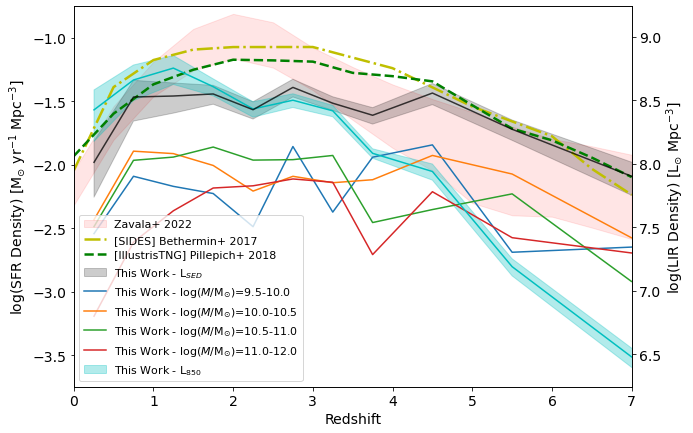

In [24]:
simstack_object.plot_total_sfrd(total_sfrd_dict, xlim=[0,7])

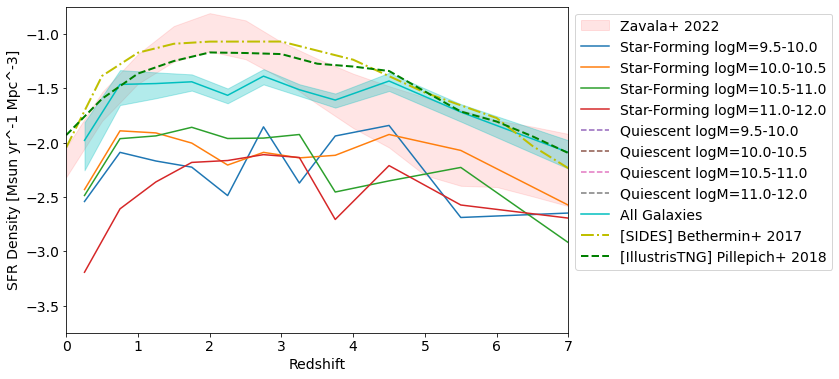

In [25]:
# Plot IR Luminosity Density and SFR Density vs Redshift
simstack_object.plot_total_lird(total_lird_dict, plot_lird=False, plot_sfrd=True, xlim=[0,7])

# Estimate Dust Temperature

redshift_0.01_0.5 T = 24.1+= 1.8
redshift_0.5_1.0 T = 29.3+= 3.6
redshift_1.0_1.5 T = 30.2+= 3.3
redshift_1.5_2.0 T = 32.8+= 2.6
redshift_2.0_2.5 T = 33.9+= 2.7
redshift_2.5_3.0 T = 39.3+= 3.1
redshift_3.0_3.5 T = 37.3+= 2.1
redshift_3.5_4.0 T = 42.3+= 2.3
redshift_4.0_5.0 T = 54.3+= 5.6
redshift_5.0_6.0 T = 77.0+= 4.7
redshift_6.0_8.0 T = 99.7+= 12.0
redshift_8.0_10.0 T = 113.2+= 5.5
20.9pm3.5 + 5.9pm1.9 + 0.5pm0.2


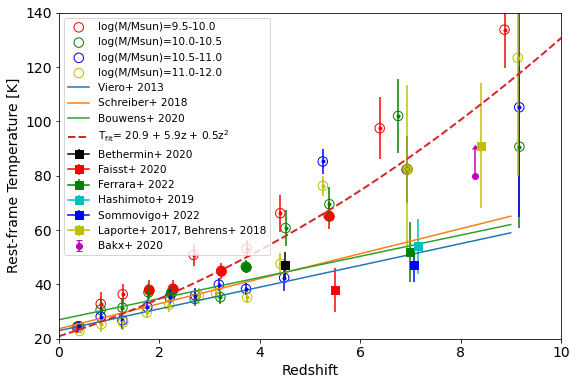

In [45]:
# List bins to impose a Temperature prior on.  These are bins that find unphysical local minima.
not_flat_prior = ['redshift_1.5_2.0__stellar_mass_9.5_10.0__split_params_1',
                  'redshift_2.0_2.5__stellar_mass_9.5_10.0__split_params_1',
                  'redshift_2.0_2.5__stellar_mass_10.0_10.5__split_params_1',
                  'redshift_3.0_3.5__stellar_mass_9.5_10.0__split_params_1',
                  'redshift_3.5_4.0__stellar_mass_10.0_10.5__split_params_1',
                  'redshift_5.0_6.0__stellar_mass_9.5_10.0__split_params_1',
                  'redshift_6.0_8.0__stellar_mass_10.5_11.0__split_params_1',
                  'redshift_6.0_8.0__stellar_mass_11.0_12.0__split_params_1']
interloper_penalty = np.array([[ 0.20099851,  0.06879776,  0.58940041,  0.48952333],
       [ 0.0948407 ,  0.22758256,  0.08905629,  0.20070159],
       [ 0.06255247,  0.24094601,  0.19262598,  0.31398456],
       [ 0.63265298,  0.43787503,  0.27097734,  0.3647857 ],
       [ 0.75762369,  0.81363313,  0.83966041,  0.589396  ],
       [ 0.5472555 ,  0.56856069,  0.72503036,  0.73933995],
       [ 0.39905207,  0.4920069 ,  0.66795137,  0.75201525],
       [ 0.69056928,  0.6155193 ,  0.95342913,  1.40408813],
       [ 1.2220494 ,  1.1792148 ,  1.47870828,  1.08992432],
       [ 1.1264991 ,  1.53962444,  1.51358723,  0.58375984],
       [ 1.98351695,  5.0005566 ,  5.70747178, 30.15626734],
       [10.49615353, 29.52801449, 40.06153674, 43.26931138]])
simstack_object.plot_rest_frame_temperature(lir_dict,  xlim=[0, 10], ylim=[2e1, 140], ylog=False, not_flat_prior=not_flat_prior, interloper_penalty=interloper_penalty,print_values=True)